# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
api_key = weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
long = []
max_temp = []
wind_speed = []

record_count = 1
set_count = 1


print("Beginning Call...")
print("...........................")

for city in cities:
    try:
        response = requests.get(f"{url}&q={city}").json()
        name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        record_count += 1
        city_name = response["name"]
        if record_count > 50:
            set_count += 1
            record_count = 1
        print(f"Processing Record {record_count} of Set {set_count} | {city_name}")
    except:
        print("No data...")
    continue
        

Beginning Call...
...........................
Processing Record 2 of Set 1 | Punta Arenas
Processing Record 3 of Set 1 | Los Llanos de Aridane
No data...
Processing Record 4 of Set 1 | Lebu
Processing Record 5 of Set 1 | Bluff
Processing Record 6 of Set 1 | Ushuaia
Processing Record 7 of Set 1 | Rikitea
Processing Record 8 of Set 1 | Port Lincoln
Processing Record 9 of Set 1 | Balakovo
Processing Record 10 of Set 1 | Teguise
Processing Record 11 of Set 1 | Avarua
No data...
Processing Record 12 of Set 1 | Vilcún
Processing Record 13 of Set 1 | Port Elizabeth
Processing Record 14 of Set 1 | New Norfolk
Processing Record 15 of Set 1 | Dikson
Processing Record 16 of Set 1 | Ambon City
Processing Record 17 of Set 1 | Babynino
No data...
Processing Record 18 of Set 1 | Kosai
Processing Record 19 of Set 1 | Port Alfred
Processing Record 20 of Set 1 | Kaitangata
Processing Record 21 of Set 1 | Tomatlán
Processing Record 22 of Set 1 | Bambous Virieux
Processing Record 23 of Set 1 | Atuona
Proc

Processing Record 44 of Set 4 | Tooele
Processing Record 45 of Set 4 | Kyaikto
Processing Record 46 of Set 4 | Fort Smith
Processing Record 47 of Set 4 | Talara
Processing Record 48 of Set 4 | Paysandu
Processing Record 49 of Set 4 | Ribeira Grande
Processing Record 50 of Set 4 | Luena
Processing Record 1 of Set 5 | Hofn
No data...
Processing Record 2 of Set 5 | Severo-Kuril'sk
Processing Record 3 of Set 5 | Río Gallegos
Processing Record 4 of Set 5 | Barrow
Processing Record 5 of Set 5 | Wilkes-Barre
Processing Record 6 of Set 5 | Gisborne
Processing Record 7 of Set 5 | Manutuke
Processing Record 8 of Set 5 | Tsaratanana
Processing Record 9 of Set 5 | Aswān
Processing Record 10 of Set 5 | Pangai
Processing Record 11 of Set 5 | São Brás de Alportel
Processing Record 12 of Set 5 | Iqaluit
Processing Record 13 of Set 5 | Tilichiki
Processing Record 14 of Set 5 | Natick
Processing Record 15 of Set 5 | Kumul
Processing Record 16 of Set 5 | Kwakoa
Processing Record 17 of Set 5 | Kahului
Pro

Processing Record 39 of Set 8 | Bajil
Processing Record 40 of Set 8 | Halifax
Processing Record 41 of Set 8 | Sioux Lookout
Processing Record 42 of Set 8 | Mount Gambier
Processing Record 43 of Set 8 | Limbang
Processing Record 44 of Set 8 | Manaure
Processing Record 45 of Set 8 | Waynesville
Processing Record 46 of Set 8 | Ambatofinandrahana
Processing Record 47 of Set 8 | Saldanha
Processing Record 48 of Set 8 | Olafsvik
Processing Record 49 of Set 8 | Marquette
Processing Record 50 of Set 8 | Flin Flon
Processing Record 1 of Set 9 | Amarante do Maranhão
Processing Record 2 of Set 9 | Estelle
Processing Record 3 of Set 9 | Yatou
Processing Record 4 of Set 9 | Venkatagiri
Processing Record 5 of Set 9 | Berdigestyakh
No data...
Processing Record 6 of Set 9 | Puerto Peñasco
Processing Record 7 of Set 9 | Tuzha
Processing Record 8 of Set 9 | Dzaoudzi
Processing Record 9 of Set 9 | Banyo
Processing Record 10 of Set 9 | Lake Shasta
Processing Record 11 of Set 9 | Aykhal
Processing Record 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [2]:
import csv 

data = {
    "City": name,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Latitude" : lat,
    "Longitude" : long,
    "Max Temperature" : max_temp,
    "Wind Speed" : wind_speed
}

df = pd.DataFrame(data)


df.to_csv(r'C:/Users/caitc/OneDrive/Desktop/DATA_BC/Homework/python-api-challenge/python-api-challenge/weather.csv', index=False)

NameError: name 'name' is not defined

In [24]:
df = pd.read_csv('C:/Users/caitc/OneDrive/Desktop/DATA_BC/Homework/python-api-challenge/python-api-challenge/weather.csv')
df

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Punta Arenas,75,CL,1600809771,57,-53.15,-70.92,48.20,16.11
1,Los Llanos de Aridane,75,ES,1600809914,83,28.66,-17.92,75.20,3.36
2,Lebu,43,CL,1600809774,73,-37.62,-73.65,51.94,18.43
3,Bluff,51,NZ,1600809805,87,-46.60,168.33,54.00,7.00
4,Ushuaia,75,AR,1600809772,74,-54.80,-68.30,44.60,21.92
...,...,...,...,...,...,...,...,...,...
561,Iracoubo,32,GF,1600810077,77,5.48,-53.20,81.79,15.70
562,Jódar,100,ES,1600810077,45,37.84,-3.35,75.99,3.04
563,Balabac,36,PH,1600810077,79,7.99,117.06,82.04,8.37
564,Kirakira,33,SB,1600810078,77,-10.45,161.92,81.43,7.23


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [25]:
df.describe()

,Cloudiness,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
count,566.000000,5.660000e+02,566.000000,566.000000,566.000000,566.000000,566.000000
mean,48.657244,1.600810e+09,70.151943,18.608410,19.728286,65.686837,8.013763
std,38.593078,1.137094e+02,21.069583,33.880881,93.593607,16.006296,5.157912
min,0.000000,1.600810e+09,6.000000,-54.800000,-179.170000,14.230000,0.340000
25%,5.000000,1.600810e+09,61.250000,-8.470000,-68.457500,53.122500,3.970000
50%,45.000000,1.600810e+09,75.000000,20.065000,26.175000,69.010000,6.930000
75%,90.000000,1.600810e+09,86.000000,46.710000,102.445000,77.625000,11.180000
max,100.000000,1.600810e+09,100.000000,78.220000,178.420000,102.200000,29.240000


In [26]:
#  Get the indices of cities that have humidity over 100%.
#N/A

In [27]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#N/A

In [28]:
# Extract relevant fields from the data frame
#N/A

# Export the City_Data into a csv
#N/A

In [29]:
# warm_enough = not_too_cloudy.drop(not_too_cloudy[not_too_cloudy['Max Temperature'] < 80].index)
# warm_enough

In [30]:
# clean_city_data = df.to_csv(r'C:/Users/caitc/OneDrive/Desktop/DATA_BC/Homework/python-api-challenge/clean_city_data.csv', index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

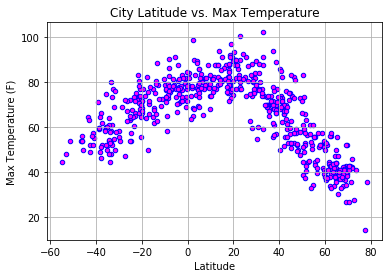

In [31]:
df.plot(kind = 'scatter', x='Latitude', y='Max Temperature', color='magenta', edgecolors='blue')
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig('C:/Users/caitc/OneDrive/Desktop/DATA_BC/Homework/python-api-challenge/python-api-challenge/WeatherPy/plots/latVtemp.png')
plt.show()

## Latitude vs. Humidity Plot

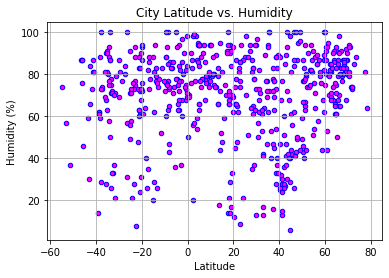

In [32]:
df.plot(kind = 'scatter', x='Latitude', y='Humidity', color='magenta', edgecolors='blue')
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig('C:/Users/caitc/OneDrive/Desktop/DATA_BC/Homework/python-api-challenge/python-api-challenge/WeatherPy/plots/latVhumidty.png')
plt.show()

## Latitude vs. Cloudiness Plot

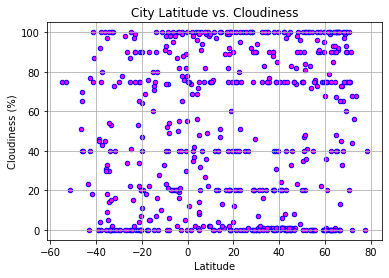

In [33]:
df.plot(kind = 'scatter', x='Latitude', y='Cloudiness', color='magenta', edgecolors='blue')
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig('C:/Users/caitc/OneDrive/Desktop/DATA_BC/Homework/python-api-challenge/python-api-challenge/WeatherPy/plots/latVclouds.png')
plt.show()

## Latitude vs. Wind Speed Plot

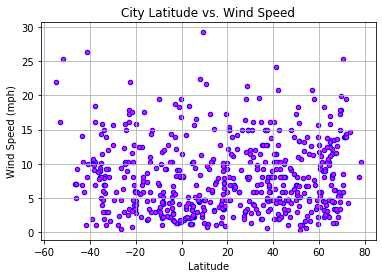

In [34]:
df.plot(kind = 'scatter', x='Latitude', y='Wind Speed', color='magenta', edgecolors='blue')
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig('C:/Users/caitc/OneDrive/Desktop/DATA_BC/Homework/python-api-challenge/python-api-challenge/WeatherPy/plots/latVwind.png')
plt.show()

## Linear Regression

In [35]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression(x, y, comparison, text):
    (slope, y_intercept, r, p, std_err) = linregress(x, y)
    fit = x * slope + y_intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(y_intercept,2)) 
    
    plt.scatter(x,y)
    plt.plot(x, fit, "r-")
    plt.annotate(line_eq, text, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(comparison)
    print(f"The r-squared is:{r**2}")
    path = 'C:/Users/caitc/OneDrive/Desktop/DATA_BC/Homework/python-api-challenge/python-api-challenge/WeatherPy/plots/'
    plt.savefig(path + comparison + ".png")
    plt.show()

In [36]:
# Create Northern and Southern Hemisphere DataFrames
S_Hemi = df.drop(df[df['Latitude'] >= 0].index, inplace=False)
N_Hemi = df.drop(df[df['Latitude'] < 0].index, inplace=False)
N_Hemi

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
1,Los Llanos de Aridane,75,ES,1600809914,83,28.66,-17.92,75.20,3.36
7,Balakovo,41,RU,1600809916,74,52.03,47.80,56.25,10.69
8,Teguise,20,ES,1600809916,78,29.06,-13.56,75.20,14.99
13,Dikson,68,RU,1600809805,88,73.51,80.55,41.05,14.65
15,Babynino,0,RU,1600809918,87,54.39,35.73,51.80,6.71
...,...,...,...,...,...,...,...,...,...
559,Kem',90,RU,1600810076,61,64.96,34.58,44.15,15.84
561,Iracoubo,32,GF,1600810077,77,5.48,-53.20,81.79,15.70
562,Jódar,100,ES,1600810077,45,37.84,-3.35,75.99,3.04
563,Balabac,36,PH,1600810077,79,7.99,117.06,82.04,8.37


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is:0.7036624938563361


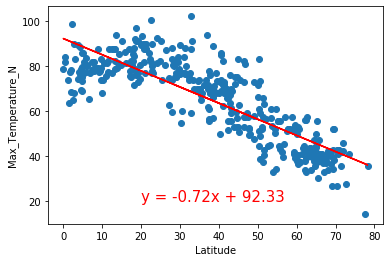

In [37]:
x = N_Hemi["Latitude"]
y = N_Hemi["Max Temperature"]
linear_regression(x,y, 'Max_Temperature_N', (20,20))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is:0.5665575375948483


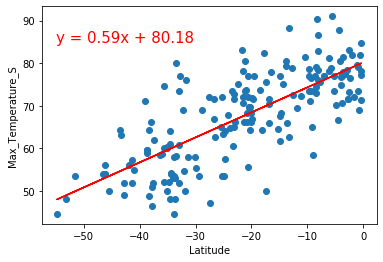

In [38]:
x = S_Hemi["Latitude"]
y = S_Hemi["Max Temperature"]
linear_regression(x,y, 'Max_Temperature_S', (-55,85))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is:0.004064843080843436


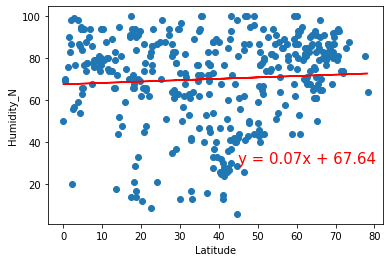

In [39]:
x = N_Hemi["Latitude"]
y = N_Hemi["Humidity"]
linear_regression(x,y, 'Humidity_N', (45,30))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is:0.0198046049164069


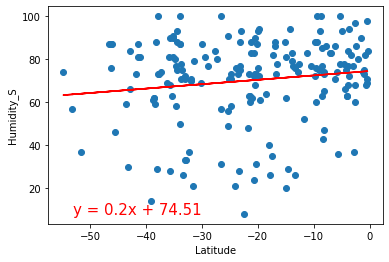

In [40]:
x = S_Hemi["Latitude"]
y = S_Hemi["Humidity"]
linear_regression(x,y, 'Humidity_S', (-53,8))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is:0.0038928279851782803


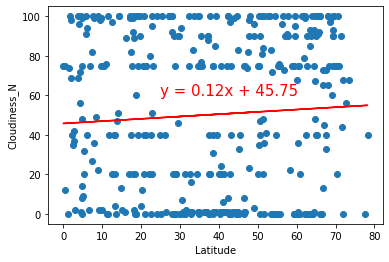

In [41]:
x = N_Hemi["Latitude"]
y = N_Hemi["Cloudiness"]
linear_regression(x,y, 'Cloudiness_N', (25,60))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is:0.011785747830666994


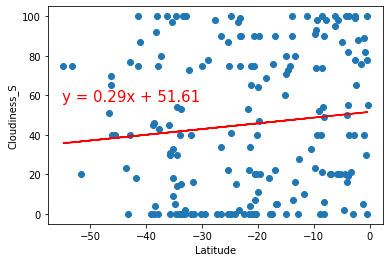

In [42]:
x = S_Hemi["Latitude"]
y = S_Hemi["Cloudiness"]
linear_regression(x,y, 'Cloudiness_S', (-55,57))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is:0.018651540860620052


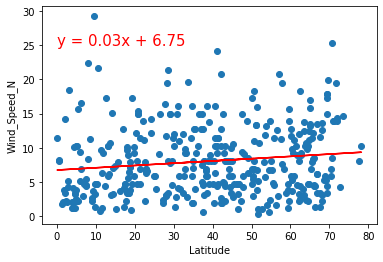

In [43]:
x = N_Hemi["Latitude"]
y = N_Hemi["Wind Speed"]
linear_regression(x,y, 'Wind_Speed_N', (0,25))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is:0.03913878488288768


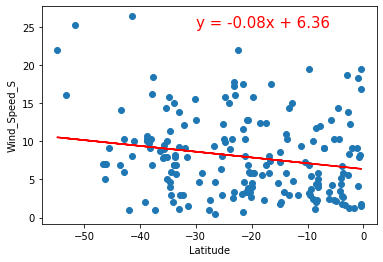

In [44]:
x = S_Hemi["Latitude"]
y = S_Hemi["Wind Speed"]
linear_regression(x,y, 'Wind_Speed_S', (-30,25))